Loading processed data from: ..\data\02_processed\kmer_features.csv
Data loaded successfully. Shape: (1509422, 504)

Sampling the data down to 50000 records...
Shape of the data sample: (50000, 504)

Standardizing data and applying PCA...
PCA completed.
Shape of PCA DataFrame: (50000, 2)

Finding the optimal number of clusters using the Elbow Method...


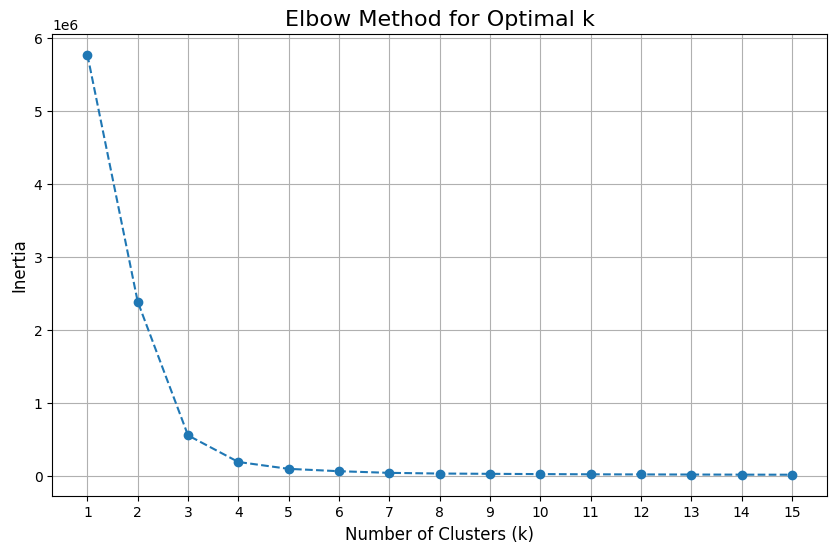


Based on the Elbow plot, the optimal number of clusters is chosen as: 6

Applying K-Means with optimal k = 6 clusters...
K-Means clustering completed.

Visualizing the final clusters...


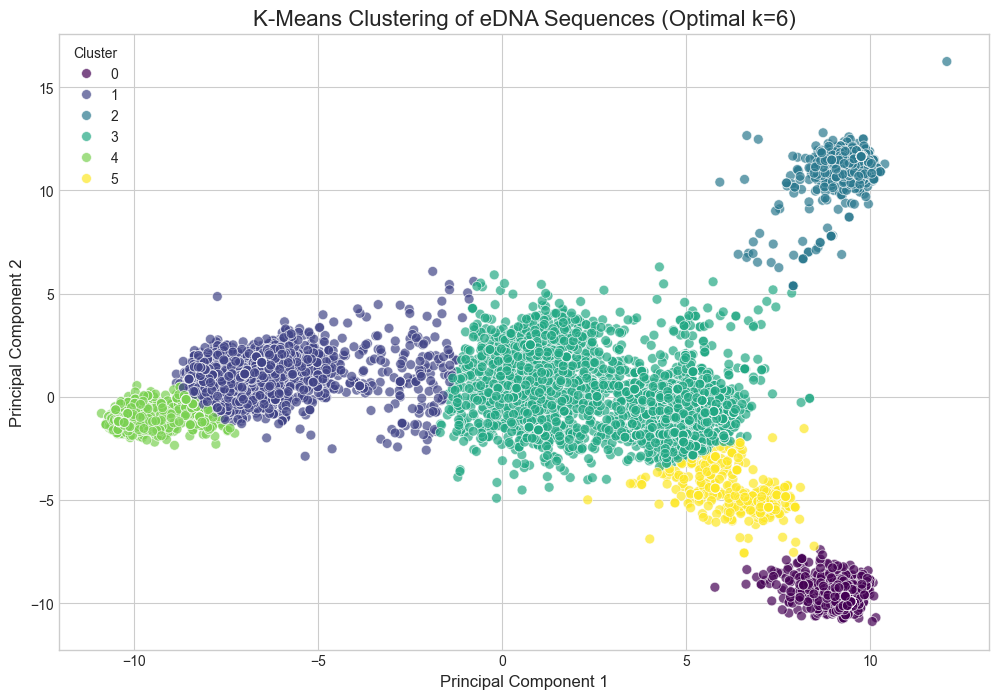


--- Model Development Complete ---
The plot above shows the discovered clusters using the optimal k. Each color represents a potential species.


In [1]:
# Import necessary libraries for machine learning
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Processed Data ---
# Load the k-mer feature matrix we created in the previous notebook.
processed_file_path = os.path.join('..', 'data', '02_processed', 'kmer_features.csv')
print(f"Loading processed data from: {processed_file_path}")
feature_df = pd.read_csv(processed_file_path)
print(f"Data loaded successfully. Shape: {feature_df.shape}")

# --- 2. Sample the Data ---
# The full dataset is very large. For initial model development and tuning,
# we will work with a smaller, random sample.
SAMPLE_SIZE = 50000  # We'll use 50,000 sequences for this run
if len(feature_df) > SAMPLE_SIZE:
    print(f"\nSampling the data down to {SAMPLE_SIZE} records...")
    data_sample = feature_df.sample(n=SAMPLE_SIZE, random_state=42) # random_state for reproducibility
else:
    data_sample = feature_df
print(f"Shape of the data sample: {data_sample.shape}")

# --- 3. Data Scaling and Dimensionality Reduction (PCA) ---
# K-Means is sensitive to the scale of features. We need to standardize the data.
# We also use PCA to reduce the 500+ k-mer features to just a few principal components.
print("\nStandardizing data and applying PCA...")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_sample)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print("PCA completed.")
print(f"Shape of PCA DataFrame: {pca_df.shape}")

# --- 4. Find the Optimal Number of Clusters (Elbow Method) ---
# Instead of guessing the number of clusters, we can use the Elbow Method.
# We run K-Means for a range of cluster numbers and plot the 'inertia'
# (within-cluster sum of squares). The "elbow" of the curve indicates the best k.
print("\nFinding the optimal number of clusters using the Elbow Method...")
inertia = []
k_range = range(1, 16)  # Test k from 1 to 15

for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_test.fit(pca_df)
    inertia.append(kmeans_test.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Based on the plot, we choose the optimal k where the curve bends.
# Let's assume the elbow is at k=6 for this example.
OPTIMAL_K = 6
print(f"\nBased on the Elbow plot, the optimal number of clusters is chosen as: {OPTIMAL_K}")

# --- 5. Apply K-Means Clustering with Optimal K ---
print(f"\nApplying K-Means with optimal k = {OPTIMAL_K} clusters...")
kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=10)
kmeans.fit(pca_df)

# Add the cluster labels back to our PCA DataFrame
pca_df['cluster'] = kmeans.labels_
print("K-Means clustering completed.")

# --- 6. Visualize the Final Clusters ---
# A scatter plot of the first two principal components is an effective way
# to see how the clustering algorithm has grouped the data.
print("\nVisualizing the final clusters...")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=50, alpha=0.7)
plt.title(f'K-Means Clustering of eDNA Sequences (Optimal k={OPTIMAL_K})', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

print("\n--- Model Development Complete ---")
print("The plot above shows the discovered clusters using the optimal k. Each color represents a potential species.")